In [33]:
import numpy as np
import dicom
import matplotlib.pyplot as plt
import pyfits
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import scipy
import sklearn, sklearn.preprocessing
from skimage.restoration import denoise_nl_means
import pyvtk
%matplotlib inline
%matplotlib notebook

In [34]:
def cropHeart(inp):
    """
    Crop the heart so that all the padding is done away with.
    Output cropped heart.
    """
    # argwhere will give you the coordinates of every non-zero point
    true_points = np.argwhere(inp)
    # take the smallest points and use them as the top left of your crop
    top_left = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    bottom_right = true_points.max(axis=0)
    out = inp[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]+1,   # inclusive
          top_left[2]:bottom_right[2]+1]  
    print(out.shape, "cropped from", inp.shape)
    return out

def plotHeart(inData, cols):
    fig, ax = plt.subplots(cols,cols)
    k = 0
    fig.suptitle("Slices of heart data")
    for i in np.arange(cols):
        for j in np.arange(cols):
            ax[i,j].imshow(inData[k])
            ax[i,j].axis("off")
            k = k + inData.shape[0]/(cols**2) +1
    print(k)
    
def importHeartData(calmFile, stressFile, resize):
    """
    Import heart data and extract the pixel array.
    Slice halfway along ind axis.
    Concatenate and return stress file and calm file.
    If resize == 1, interpolate data to fit (34,34) arr.
    """
    calmTmp = dicom.read_file(calmFile).pixel_array
    stressTmp = dicom.read_file(stressFile).pixel_array

    calmTmp = cropHeart(calmTmp)
    stressTmp = cropHeart(stressTmp)

    # Pad the 3d arrays with zeros so that they are all the same size
    zeroArr0 = np.zeros((34,34,34))
    zeroArr1 = np.zeros((34,34,34))

    if resize == 1:
        # Resize the 3D slices
        calmRatio = 34.0/np.amax(calmTmp.shape)
        stressRatio = 34.0/np.amax(stressTmp.shape)

        calm3d = scipy.ndimage.interpolation.zoom(calmTmp, (calmRatio))
        stress3d = scipy.ndimage.interpolation.zoom(stressTmp, (stressRatio))

        zeroArr0[:calm3d.shape[0],:calm3d.shape[1],:calm3d.shape[2]] = calm3d
        zeroArr1[:stress3d.shape[0],:stress3d.shape[1],:stress3d.shape[2]] = stress3d

    else:
        zeroArr0[:calm3d.shape[0],:calm3d.shape[1],:calm3d.shape[2]] = calm3d
        zeroArr1[:stress3d.shape[0],:stress3d.shape[1],:stress3d.shape[2]] = stress3d

    zeroArr0 = normalise(zeroArr0)
    zeroArr1 = normalise(zeroArr1)

    catOut = [zeroArr0, zeroArr1]
    return catOut
    
def normalise(inData):
    """
    Normalise 3D data.
    """
    inDataAbs = np.fabs(inData)
    inDataMax = np.amax(inData)
    croppednorm = inDataAbs/inDataMax
    return croppednorm

In [37]:
#ds0 = dicom.read_file("./data/nlst/7/RESTRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.149242122.1391620200.dcm")
#px0 = ds0.pixel_array

#inData = importHeartData("./data/nlst/7/RESTRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.149242122.1391620200.dcm",\
#                        "./data/nlst/7/STRESSRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.1793586668.13916201980.dcm",\
#                        1)
#ds1 = dicom.read_file("./data/nlst/7/STRESSRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.1793586668.13916201980.dcm")
#px1 = ds1.pixel_array

#ds2 = pyfits.open("/tmp/stress_infarction_0000.fits")[0].data

In [4]:
#cropped = cropHeart(px1)
#croppednorm = normalise(cropped)
#denoised = denoise_nl_means(croppednorm, h=0.1, multichannel=False)
#plotHeart(cropped, 3)
#cropped0 = cropHeart(px0)
#cropped1 = normalise(cropHeart(ds2))

In [5]:
#print(croppednorm[10])
#print(cropped[10])
#print(denoised[10])
a = np.array(inData[0])
a
#inData[0].shape[0], cube.shape

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

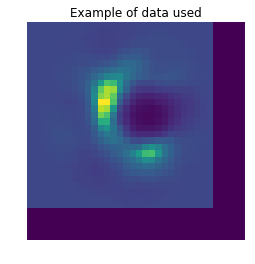

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = cube[0]

def animate(i):
    data = cube[i]
    return ax.imshow(data)

plt.axis("off")
plt.title("Example of data used")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(cube.shape[0]), repeat=False)
anim.save("/tmp/3D-Data-Example.mp4")

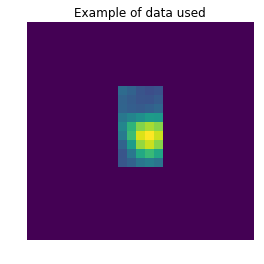

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = croppednorm[0]

def animate(i):
    data = croppednorm[i]
    return ax.imshow(data)

plt.axis("off")
plt.title("Example of data used")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(croppednorm.shape[0]), repeat=False)
anim.save("/tmp/3D-Data-Example1.mp4")

In [24]:
from mayavi import mlab

In [140]:
what2 = np.load("/home/mike/Documents/UoH_job/heart_cnn/logs/lossCubes/2017-08-01_15:52:00_ppt41_lossCube.npy")
what = np.load("/home/mike/Documents/UoH_job/heart_cnn/logs/lossCubes/2017-08-01_15:52:00_ppt41_heartCube.npy")[...,1]

mlab.pipeline.iso_surface(mlab.pipeline.scalar_field(what2), opacity=0.4)

mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(what),
                            plane_orientation='x_axes',
                            slice_index=what.shape[0]/2,
                        )
mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(what),
                            plane_orientation='y_axes',
                            slice_index=what.shape[1]/2,
                        )

mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(what),
                            plane_orientation='z_axes',
                            slice_index=what.shape[2]/2,
                        )

mlab.axes()
mlab.show()

In [96]:
loss=5
width = 5
lossCube=np.zeros((15,15))
for i in np.arange(lossCube.shape[0]-width):
    for j in np.arange(lossCube.shape[1]-width):
        lossCube[i+width/2,j+width/2] = loss

In [109]:
what2 = np.load("/home/mike/Documents/UoH_job/heart_cnn/logs/lossCubes/2017-08-01_13:51:00_ppt40_lossCube.npy")
print(what2[10,10:20,10:20])
what2 = abs(what2-1)
print(what2[10,10:20,10:20])

[[  9.99438112e-01   9.99236071e-01   9.97926470e-01   9.80120556e-01
    9.15529621e-01   7.22924173e-01   4.40035534e-01   5.21143647e-01
    7.33187197e-01   9.33711240e-01]
 [  9.99522529e-01   9.99077013e-01   9.88595912e-01   7.74175860e-01
    1.91073894e-01   2.56264394e-02   4.55454095e-03   5.34440329e-03
    1.35641225e-02   9.42772748e-02]
 [  9.99200062e-01   9.93849340e-01   8.32640875e-01   1.46167576e-01
    1.05076313e-02   1.86666010e-03   7.28814785e-04   6.84996473e-04
    1.05014907e-03   2.39516260e-03]
 [  9.97731285e-01   9.52127153e-01   3.59625294e-01   2.36561654e-02
    2.49573606e-03   1.00507881e-03   3.47565660e-04   2.83477653e-04
    4.35977302e-04   9.50946800e-04]
 [  9.90093007e-01   8.48914042e-01   1.95477783e-01   1.45112538e-02
    2.64287020e-03   1.15948620e-03   4.79676381e-04   3.53646569e-04
    4.71806970e-04   1.04067001e-03]
 [  9.84462623e-01   8.54416847e-01   3.93240319e-01   1.10153216e-01
    4.26708090e-02   9.54798043e-03   1.71320

In [85]:
print(normalise(lossCube))

[[ 0.07407407  0.13580247  0.19753086  0.25925926  0.25925926  0.25925926
   0.25925926  0.19753086  0.13580247  0.07407407]
 [ 0.13580247  0.25925926  0.38271605  0.50617284  0.50617284  0.50617284
   0.50617284  0.38271605  0.25925926  0.13580247]
 [ 0.19753086  0.38271605  0.56790123  0.75308642  0.75308642  0.75308642
   0.75308642  0.56790123  0.38271605  0.19753086]
 [ 0.25925926  0.50617284  0.75308642  1.          1.          1.          1.
   0.75308642  0.50617284  0.25925926]
 [ 0.25925926  0.50617284  0.75308642  1.          1.          1.          1.
   0.75308642  0.50617284  0.25925926]
 [ 0.25925926  0.50617284  0.75308642  1.          1.          1.          1.
   0.75308642  0.50617284  0.25925926]
 [ 0.25925926  0.50617284  0.75308642  1.          1.          1.          1.
   0.75308642  0.50617284  0.25925926]
 [ 0.19753086  0.38271605  0.56790123  0.75308642  0.75308642  0.75308642
   0.75308642  0.56790123  0.38271605  0.19753086]
 [ 0.13580247  0.25925926  0.382